<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png" width=50%/>

<h1><font color='#12007a'>Procesamiento de Lenguaje Natural con Aprendizaje Profundo</font></h1>
<p>Autor: Jorge Fernández García</p>
<p>Tutora: Isabel Segura Bedmar</p>

<img align='right' src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>      

# **Visualización de los DataSet**



In [22]:
!pip install datasets

## **Cargar un dataset**





###Cargamos el Dataset de detección, en español e inglés

In [23]:
import pandas as pd
from datasets import load_dataset

dataset_en = load_dataset("symanto/autextification2023", "detection_en")
dataset_es = load_dataset("symanto/autextification2023", "detection_es")

dataset_en, dataset_es

(DatasetDict({
     train: Dataset({
         features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
         num_rows: 33845
     })
     test: Dataset({
         features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
         num_rows: 21832
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
         num_rows: 32062
     })
     test: Dataset({
         features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
         num_rows: 20129
     })
 }))

**Dataset en Inglés**

In [24]:
# Train split
en_df_train = pd.DataFrame(dataset_en['train'])
# Test split
en_df_test = pd.DataFrame(dataset_en['test'])

print('Tamaño del dataset train inglés:', en_df_train.shape)
print('Tamaño del dataset test inglés:', en_df_test.shape)

#show the first rows
print('\nTrain EN data')
en_df_train.head()

Tamaño del dataset train inglés: (33845, 6)
Tamaño del dataset test inglés: (21832, 6)

Train EN data


,id,prompt,text,label,domain,model
0,12322,you need to stop the,you need to stop the engine and wait until it ...,1,tweets,bloom-3b
1,1682,Article 11. On the basis of the information co...,The Commission shall publish the report; an in...,1,legal,bloom-7b1
2,22592,I have not been tweeting,"I have not been tweeting a lot lately, but I d...",1,tweets,babbage
3,17390,NO-PROMPT,I pass my exam and really thankgod for that bu...,0,tweets,NO-MODEL
4,30453,NO-PROMPT,The template will have 3 parts: a mustache sha...,0,wiki,NO-MODEL


In [25]:
print('Test EN data')
en_df_test.head()

Test EN data


,id,prompt,text,label,domain,model
0,15725,NO-PROMPT,It has remained one of my favorite country/swi...,0,reviews,NO-MODEL
1,17108,NO-PROMPT,Even with very light use (hard to get motivate...,0,reviews,NO-MODEL
2,383,"His mother, Ivy Close, who won the first ever ...",She died in 2015 at age 93. She is survived by...,1,news,bloom-1b7
3,7809,NO-PROMPT,Londonderry Crown Court heard how Heaney false...,0,news,NO-MODEL
4,6215,NO-PROMPT,"Will Genia, Lachie Turner and Berrick Barnes e...",0,news,NO-MODEL


De momento, mantenemos todos las columnas, ya que pueden ser de utilidad en el análisis.

**Dataset en Español**

In [26]:
# Train split
es_df_train = pd.DataFrame(dataset_es['train'])
# Test split
es_df_test = pd.DataFrame(dataset_es['test'])

print('Tamaño del dataset train español:', es_df_train.shape)
print('Tamaño del dataset test español:', es_df_test.shape)

Tamaño del dataset train español: (32062, 6)
Tamaño del dataset test español: (20129, 6)


## **Distribución de clases**



### INGLÉS

In [27]:
en_counts_train = en_df_train['label'].value_counts().to_dict()
print("Distribución en training:", en_counts_train)

en_counts_test = en_df_test['label'].value_counts().to_dict()
en_counts_test = dict(sorted(en_counts_test.items()))
print("Distribución en test:", en_counts_test)

en_LABELS=en_counts_train.keys()
print(en_LABELS)

Distribución en training: {0: 17046, 1: 16799}
Distribución en test: {0: 10642, 1: 11190}
dict_keys([0, 1])


Tienen proporciones similares, los representamos en un histograma.

Text(0, 0.5, 'Número de Instancias')

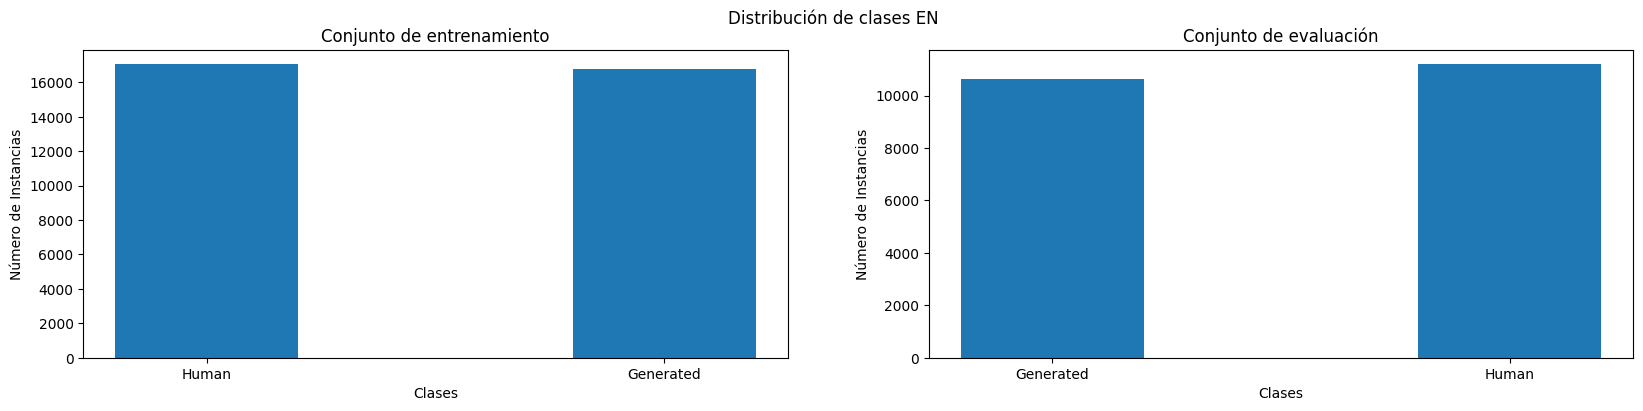

In [28]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución de clases EN')
ax_train.bar(en_LABELS, en_counts_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xticks([0, 1])
ax_train.set_xticklabels(["Human", "Generated"])
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(en_LABELS, en_counts_test.values(), width=0.4)
ax_test.set_title('Conjunto de evaluación')
ax_test.set_xticks([0, 1])
ax_test.set_xticklabels(["Generated", "Human"])
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

### ESPAÑOL

In [29]:
es_counts_train = es_df_train['label'].value_counts().to_dict()
es_counts_train = dict(sorted(es_counts_train.items()))
print("Distribución en training:", es_counts_train)

es_counts_test = es_df_test['label'].value_counts().to_dict()
es_counts_test = dict(sorted(es_counts_test.items()))
print("Distribución en test:", es_counts_test)

es_LABELS=es_counts_train.keys()

print(es_LABELS)

Distribución en training: {0: 15787, 1: 16275}
Distribución en test: {0: 8920, 1: 11209}
dict_keys([0, 1])


Text(0, 0.5, 'Número de Instancias')

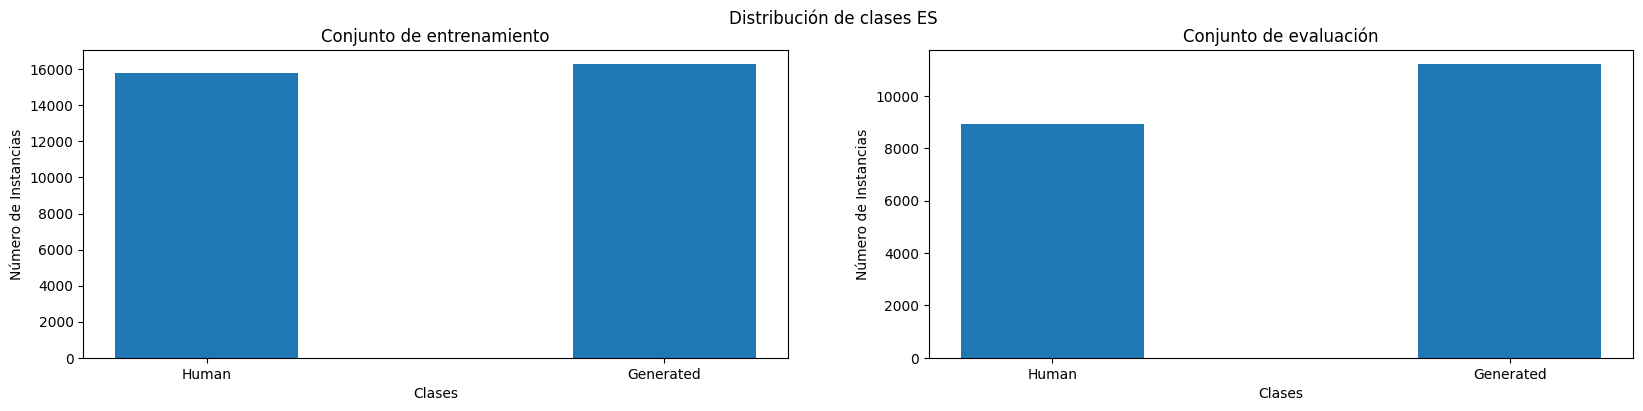

In [30]:
# TODO: cambiar ejes: Human, Generated

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución de clases ES')
ax_train.bar(es_LABELS, es_counts_train.values(), width=0.4)
ax_train.set_xticks([0, 1])
ax_train.set_xticklabels(["Human", "Generated"])
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(es_LABELS, es_counts_test.values(), width=0.4)
ax_test.set_xticks([0, 1])
ax_test.set_xticklabels(["Human", "Generated"])
ax_test.set_title('Conjunto de evaluación')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

## **Distribución del tamaño de los textos**


### **INGLÉS**

#### En Training y Test

Calculamos directamente la longitud media, desviación, etc:

In [31]:
en_length_train=en_df_train['text'].apply(lambda text: len(text.split()))
en_length_train.describe()

count    33845.00000
mean        53.65992
std         28.66047
min          1.00000
25%         22.00000
50%         62.00000
75%         81.00000
max         98.00000
Name: text, dtype: float64

In [32]:
en_length_train.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    33845.00000
mean        53.65992
std         28.66047
min          1.00000
25%         22.00000
50%         62.00000
75%         81.00000
90%         87.00000
95%         89.00000
99%         92.00000
max         98.00000
Name: text, dtype: float64


*   El **25%** de los textos tienen menos de **22 tokens**.
*   El **50%** de los textos tienen menos de **62 tokens**.
*   El **75%** de los textos tienen menos de **81 tokens**.
*   El **90%** de los textos tienen menos de **87 tokens**.
*   El **95%** de los textos tienen menos de **89 tokens**.
*   El **99%** de los textos tienen menos de **92 tokens**.

In [33]:
en_length_test=en_df_test['text'].apply(lambda text: len(text.split()))
en_length_test.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    21832.000000
mean        62.629306
std         20.796394
min          1.000000
25%         52.000000
50%         69.000000
75%         77.000000
90%         84.000000
95%         86.000000
99%         91.000000
max         98.000000
Name: text, dtype: float64

El tamaño medio es mayor, además, la gran mayoría de textos superan los 50 carácteres, al contrario que en el conjunto de entrenamiento

Text(0, 0.5, 'Número de Textos')

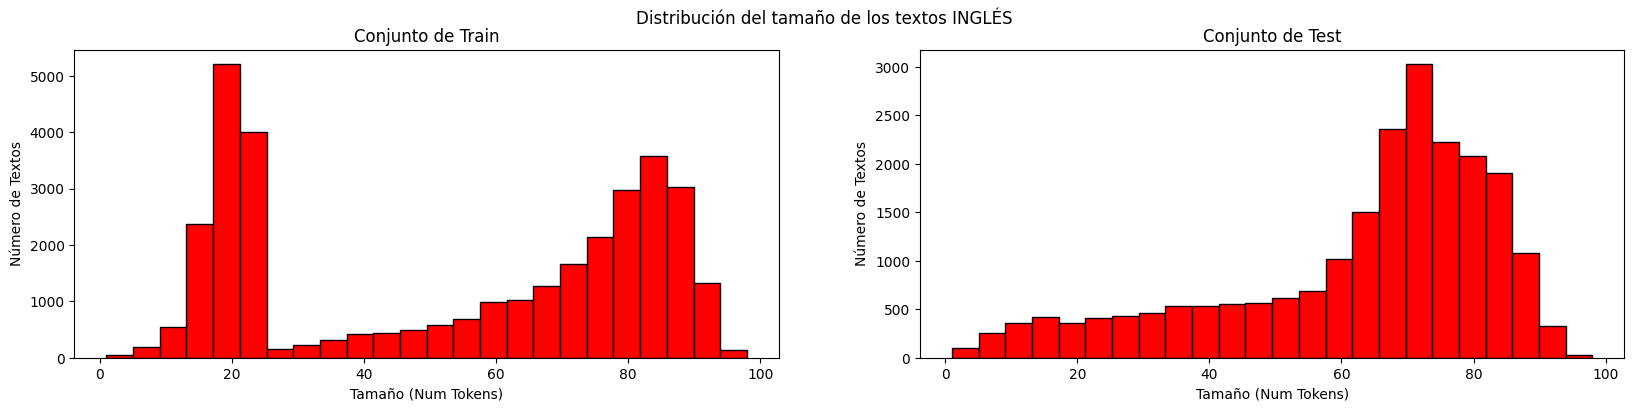

In [34]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los textos INGLÉS')

ax_train.hist(en_length_train,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_train.set_title('Conjunto de Train')
ax_train.set_xlabel('Tamaño (Num Tokens)')
ax_train.set_ylabel('Número de Textos')

ax_test.hist(en_length_test,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Tamaño (Num Tokens)')
ax_test.set_ylabel('Número de Textos')

# TODO: Comentar graficas con los datos de los percentiles (sin tabla)




También nos podría ser interesante conocer si los textos de una determinada clase tienen la misma longitud que los textos del resto de clases. En este caso, lo mejor es utilizar un gráfico de densidad.
En este caso, lo cálcularemos para todo el dataset.



#### Según Clase

Text(0, 0.5, 'Densidad')

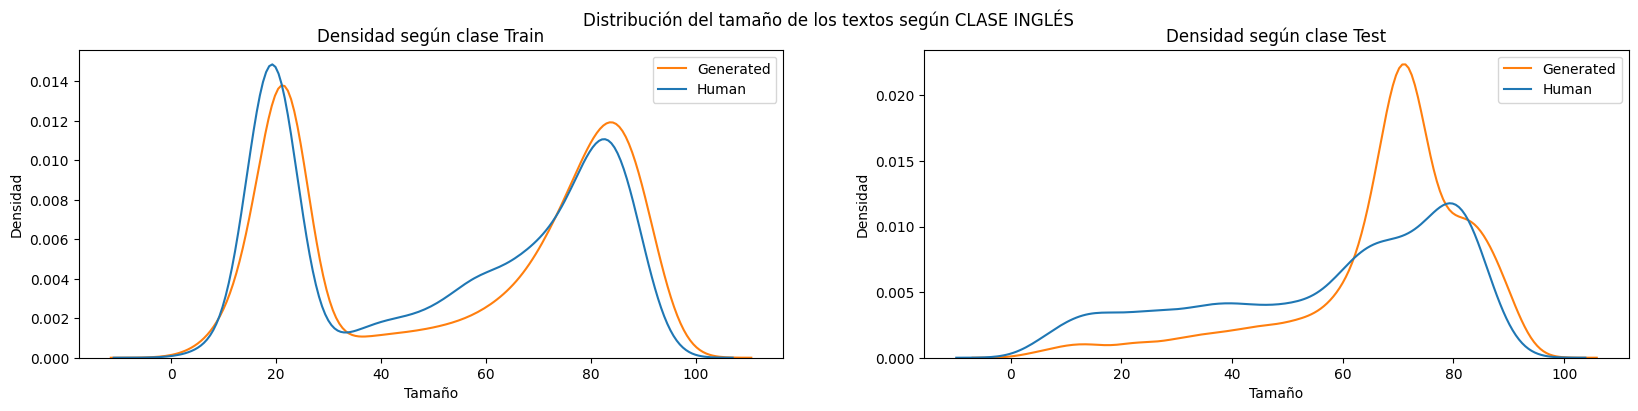

In [35]:
import seaborn as sns
#TODO: Cambiar labels

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los textos según CLASE INGLÉS')

en_df_train['Length'] = en_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_train, x='Length', hue='label', ax=ax_train)
ax_train.legend(list({"Human", "Generated"}))
ax_train.set_title('Densidad según clase Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

en_df_test['Length'] = en_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_test, x='Length', hue='label', ax=ax_test)
ax_test.legend(list({"Human", "Generated"}))
ax_test.set_title('Densidad según clase Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

# Comentar los resultados con el artículo de los organizadores (de donde vienen)

#### Según Modelo

In [36]:
en_counts_models_train = en_df_train['model'].value_counts().to_dict()
print("Distribución en training:", en_counts_models_train)

en_MODELS=en_counts_models_train.keys()
print(en_MODELS)

Distribución en training: {'NO-MODEL': 17046, 'text-davinci-003': 2859, 'curie': 2843, 'babbage': 2834, 'bloom-7b1': 2808, 'bloom-1b7': 2750, 'bloom-3b': 2705}
dict_keys(['NO-MODEL', 'text-davinci-003', 'curie', 'babbage', 'bloom-7b1', 'bloom-1b7', 'bloom-3b'])


Text(0, 0.5, 'Densidad')

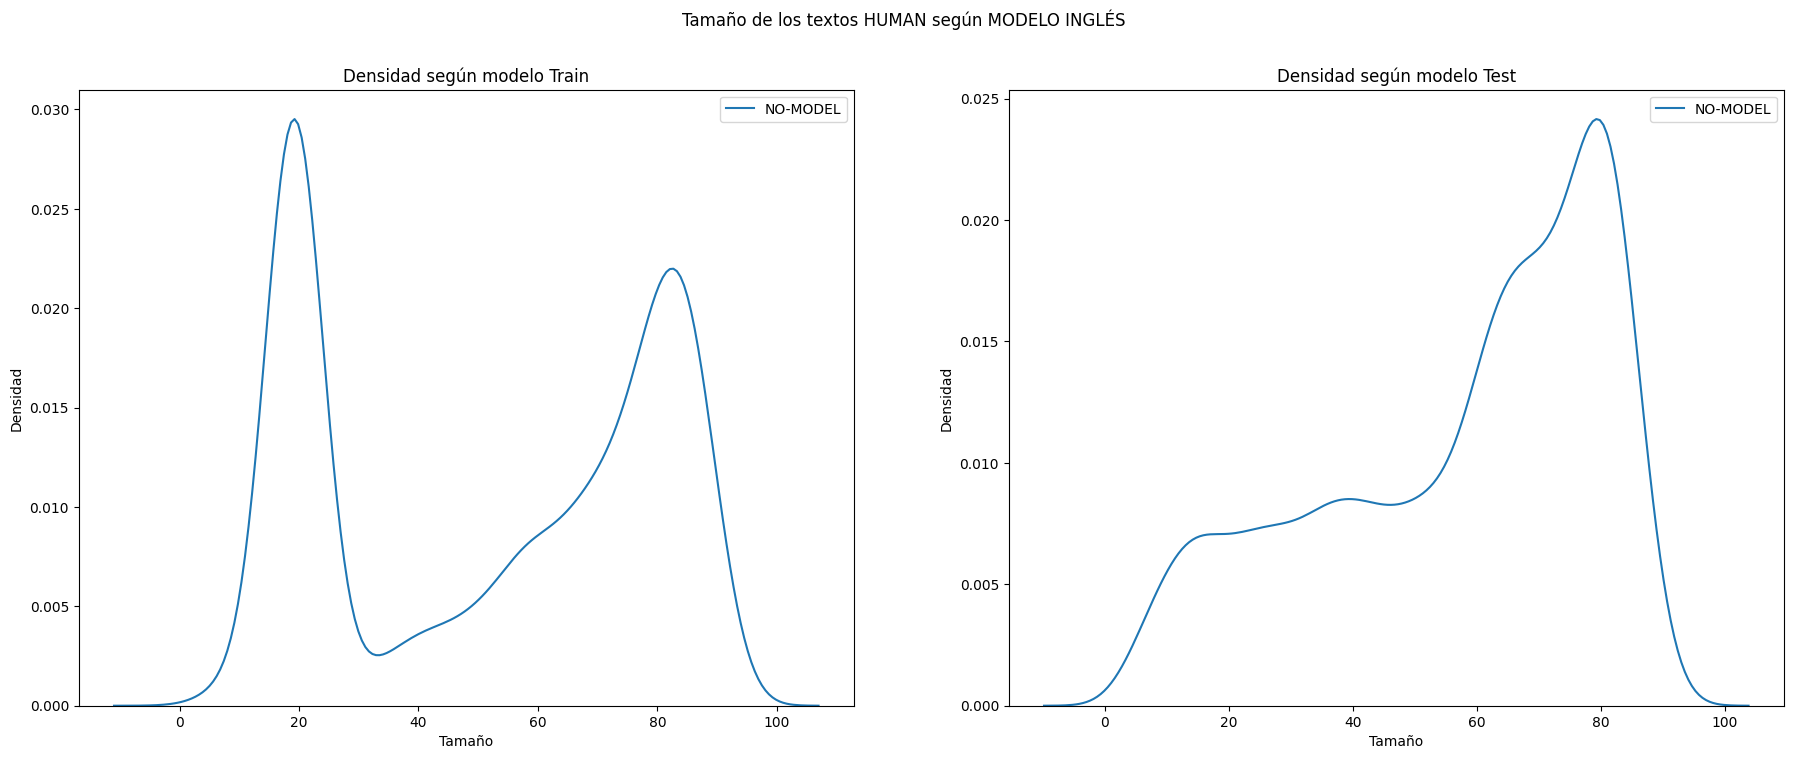

In [37]:
import seaborn as sns


fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Tamaño de los textos HUMAN según MODELO INGLÉS')

en_df_train['Length'] = en_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_train[en_df_train['label'] == 0], x='Length', hue='model', ax=ax_train)
ax_train.legend(['NO-MODEL'])
ax_train.set_title('Densidad según modelo Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

en_df_test['Length'] = en_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_test[en_df_test['label'] == 0], x='Length', hue='model', ax=ax_test)
ax_test.legend(['NO-MODEL'])
ax_test.set_title('Densidad según modelo Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

Text(0, 0.5, 'Densidad')

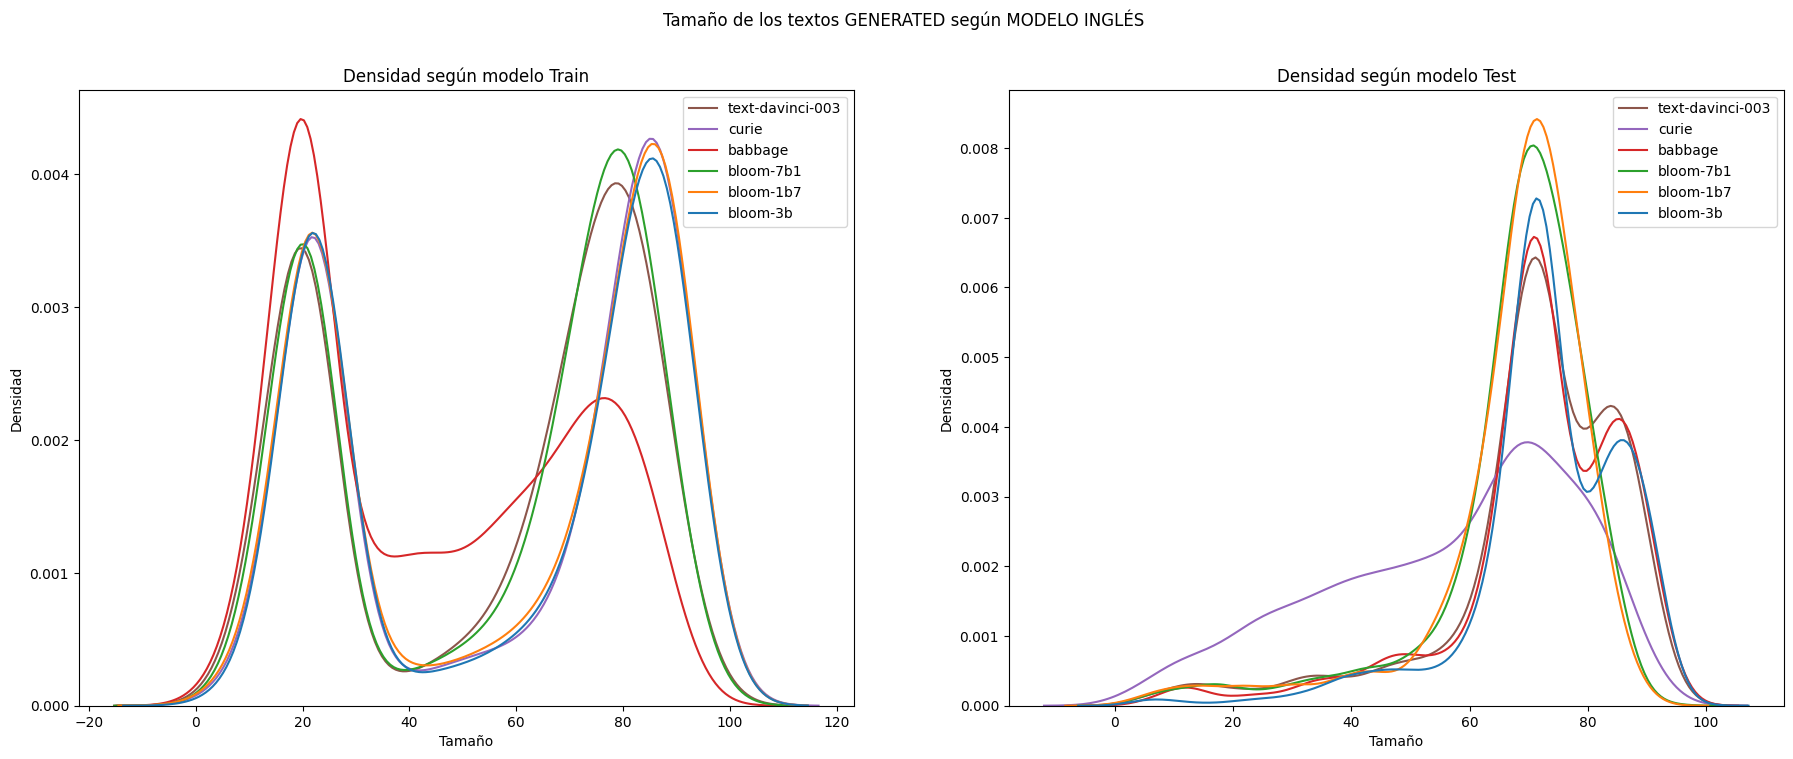

In [38]:
import seaborn as sns


fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Tamaño de los textos GENERATED según MODELO INGLÉS')

en_df_train['Length'] = en_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_train[en_df_train['label'] == 1], x='Length', hue='model', ax=ax_train)
ax_train.legend(list(en_MODELS)[1:])
ax_train.set_title('Densidad según modelo Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

en_df_test['Length'] = en_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=en_df_test[en_df_test['label'] == 1], x='Length', hue='model', ax=ax_test)
ax_test.legend(list(en_MODELS)[1:])
ax_test.set_title('Densidad según modelo Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

# Comentar de donde vienen los resultados (con qué datos se entrena cada modelo)

### **ESPAÑOL**

#### En Training y Test

In [ ]:
es_length_train=es_df_train['text'].apply(lambda text: len(text.split()))
es_length_train.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    32062.000000
mean        52.077693
std         27.724449
min          1.000000
25%         21.000000
50%         64.000000
75%         78.000000
90%         83.000000
95%         86.000000
99%         90.000000
max        131.000000
Name: text, dtype: float64

In [ ]:
es_length_test=es_df_test['text'].apply(lambda text: len(text.split()))
es_length_test.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    20129.000000
mean        62.813006
std         19.800074
min          1.000000
25%         53.000000
50%         62.000000
75%         80.000000
90%         85.000000
95%         87.000000
99%         90.000000
max        136.000000
Name: text, dtype: float64

Text(0, 0.5, 'Número de Textos')

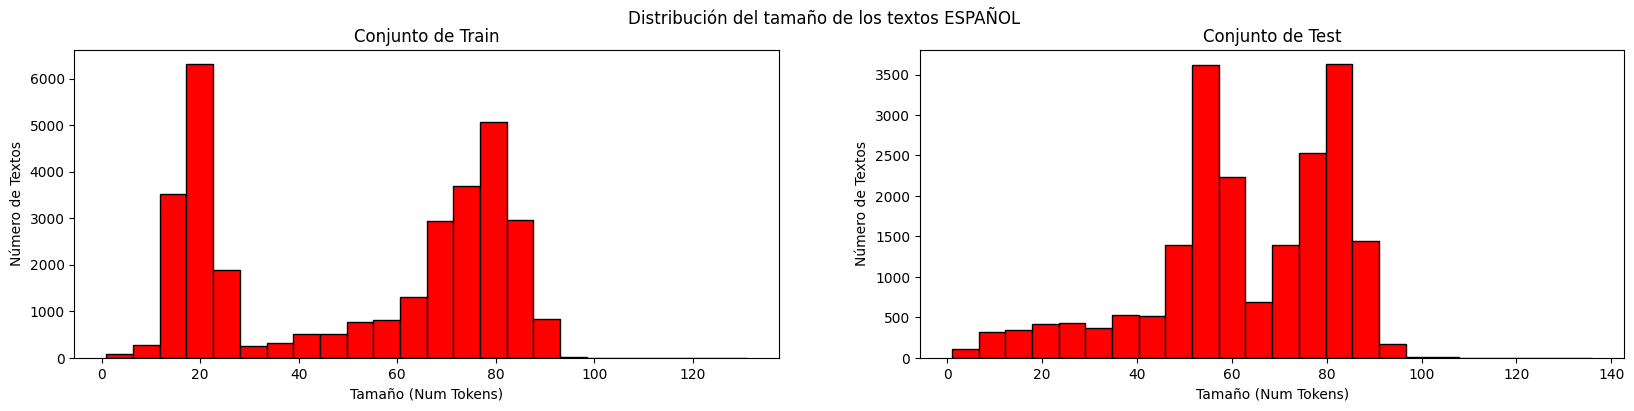

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los textos ESPAÑOL')

ax_train.hist(es_length_train,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_train.set_title('Conjunto de Train')
ax_train.set_xlabel('Tamaño (Num Tokens)')
ax_train.set_ylabel('Número de Textos')

ax_test.hist(es_length_test,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Tamaño (Num Tokens)')
ax_test.set_ylabel('Número de Textos')



#### Según Clase

Text(0, 0.5, 'Densidad')

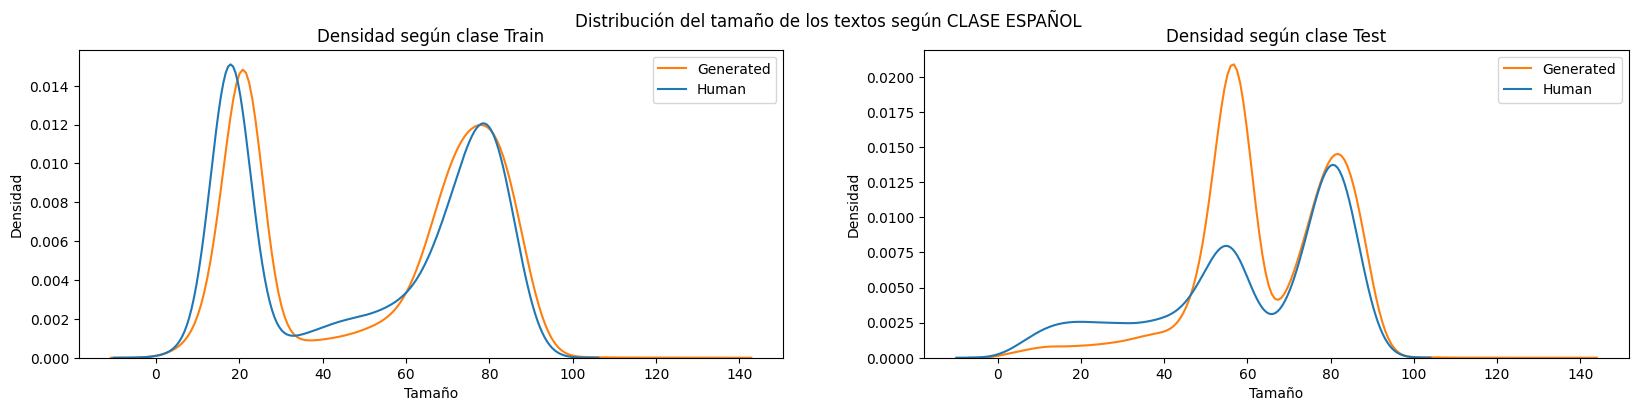

In [ ]:
import seaborn as sns


fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los textos según CLASE ESPAÑOL')

es_df_train['Length'] = es_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_train, x='Length', hue='label', ax=ax_train)
ax_train.legend(list({"Human", "Generated"}))
ax_train.set_title('Densidad según clase Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

es_df_test['Length'] = es_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_test, x='Length', hue='label', ax=ax_test)
ax_test.legend(list({"Human", "Generated"}))
ax_test.set_title('Densidad según clase Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

#### Según Modelo

In [ ]:
es_counts_models_train = es_df_train['model'].value_counts().to_dict()
print("Distribución en training:", es_counts_models_train)

es_MODELS=es_counts_models_train.keys()
print(es_MODELS)

Distribución en training: {'NO-MODEL': 15787, 'curie': 2855, 'text-davinci-003': 2849, 'babbage': 2817, 'bloom-7b1': 2635, 'bloom-3b': 2602, 'bloom-1b7': 2517}
dict_keys(['NO-MODEL', 'curie', 'text-davinci-003', 'babbage', 'bloom-7b1', 'bloom-3b', 'bloom-1b7'])


Text(0, 0.5, 'Densidad')

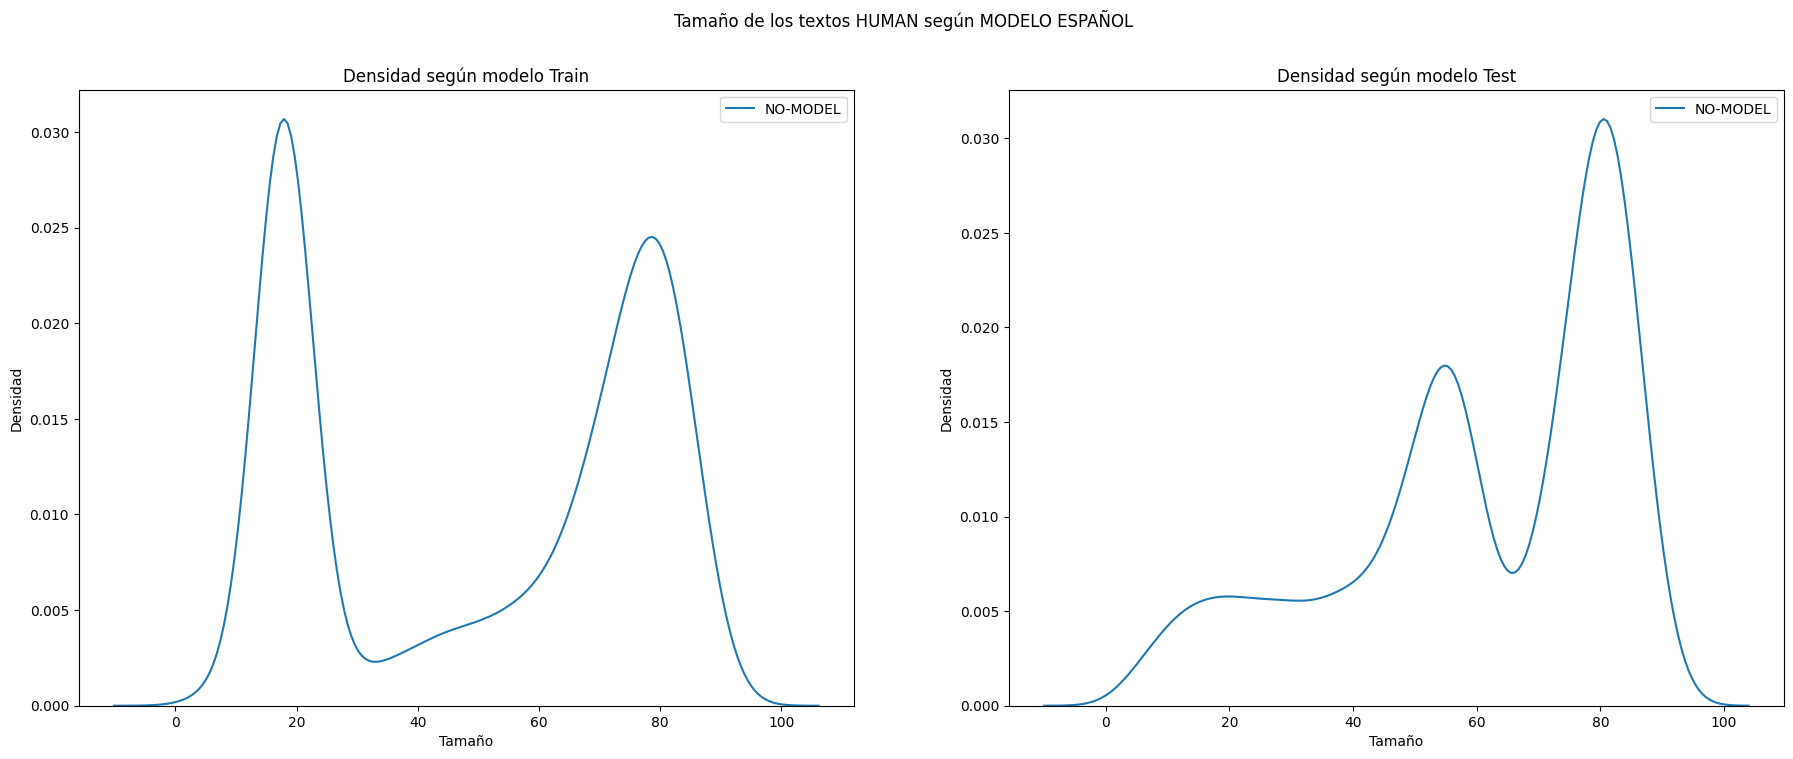

In [ ]:
import seaborn as sns


fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Tamaño de los textos HUMAN según MODELO ESPAÑOL')

es_df_train['Length'] = es_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_train[es_df_train['label'] == 0], x='Length', hue='model', ax=ax_train)
ax_train.legend(['NO-MODEL'])
ax_train.set_title('Densidad según modelo Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

es_df_test['Length'] = es_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_test[es_df_test['label'] == 0], x='Length', hue='model', ax=ax_test)
ax_test.legend(['NO-MODEL'])
ax_test.set_title('Densidad según modelo Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

Text(0, 0.5, 'Densidad')

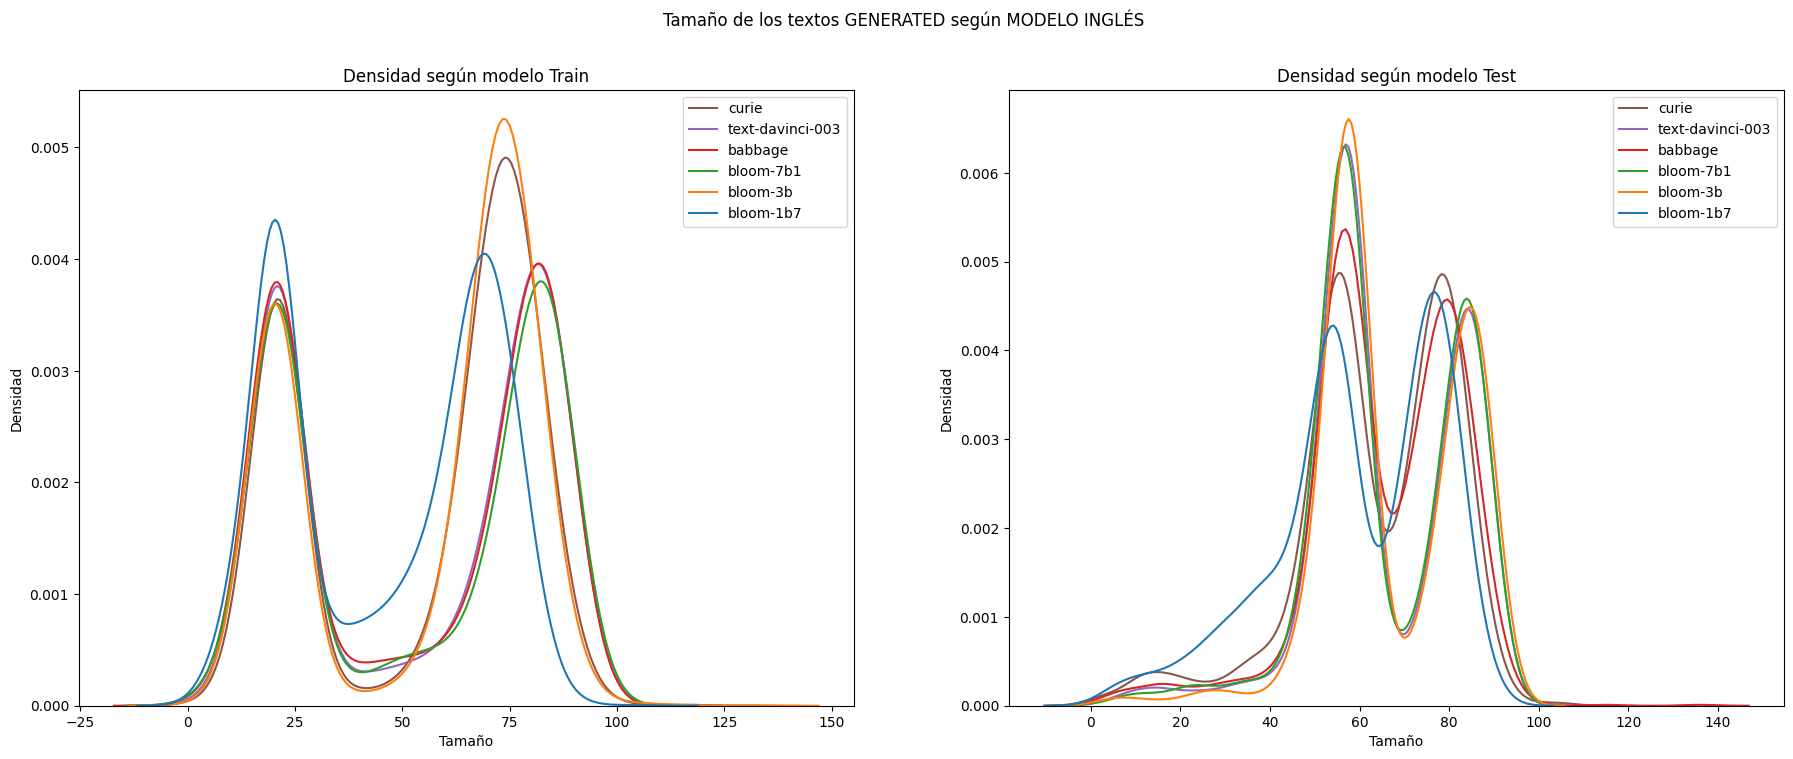

In [ ]:
import seaborn as sns


fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Tamaño de los textos GENERATED según MODELO INGLÉS')

es_df_train['Length'] = es_df_train['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_train[es_df_train['label'] == 1], x='Length', hue='model', ax=ax_train)
ax_train.legend(list(es_MODELS)[1:])
ax_train.set_title('Densidad según modelo Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Densidad')

es_df_test['Length'] = es_df_test['text'].apply(lambda text: len(text.split()))
sns.kdeplot(data=es_df_test[es_df_test['label'] == 1], x='Length', hue='model', ax=ax_test)
ax_test.legend(list(es_MODELS)[1:])
ax_test.set_title('Densidad según modelo Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Densidad')

## **Distribución del tamaño de los Prompt**


### **INGLÉS**

In [ ]:
en_length_prompt_train=en_df_train['prompt'][en_df_train['prompt'] != 'NO-PROMPT'].apply(lambda text: len(text.split()))
en_length_prompt_test=en_df_test['prompt'][en_df_test['prompt'] != 'NO-PROMPT'].apply(lambda text: len(text.split()))

Text(0, 0.5, 'Número de Instancias')

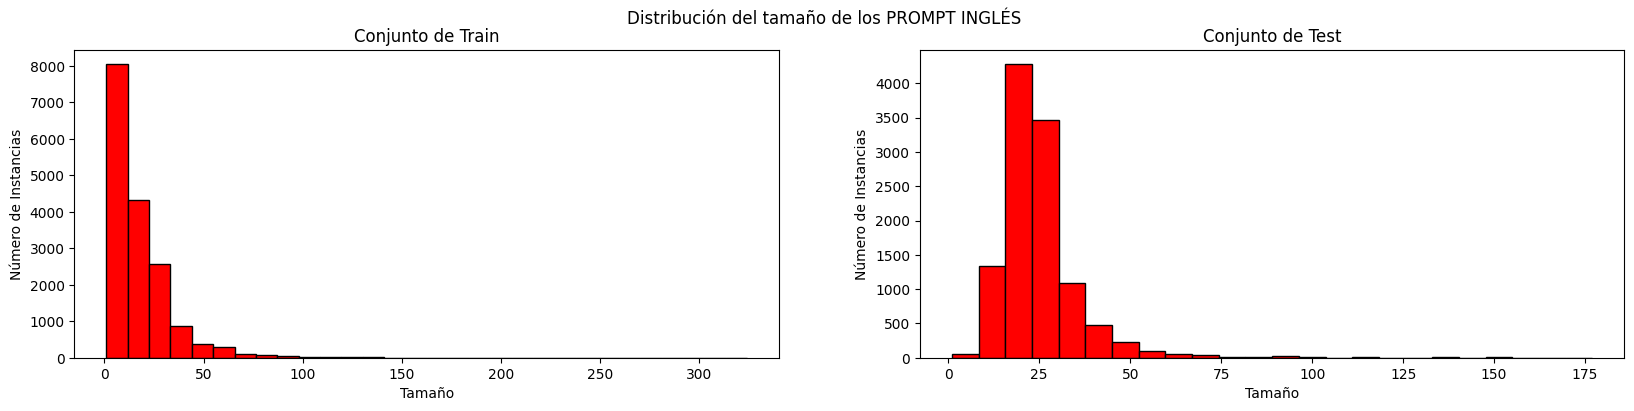

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los PROMPT INGLÉS')

ax_train.hist(en_length_prompt_train,  color = 'red', edgecolor = 'black',
         bins = int(150/5))
ax_train.set_title('Conjunto de Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Número de Instancias')

ax_test.hist(en_length_prompt_test,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Número de Instancias')



### **ESPAÑOL**

In [ ]:
es_length_prompt_train=es_df_train['prompt'][es_df_train['prompt'] != 'NO-PROMPT'].apply(lambda text: len(text.split()))
es_length_prompt_test=es_df_test['prompt'][es_df_test['prompt'] != 'NO-PROMPT'].apply(lambda text: len(text.split()))

Text(0, 0.5, 'Número de Instancias')

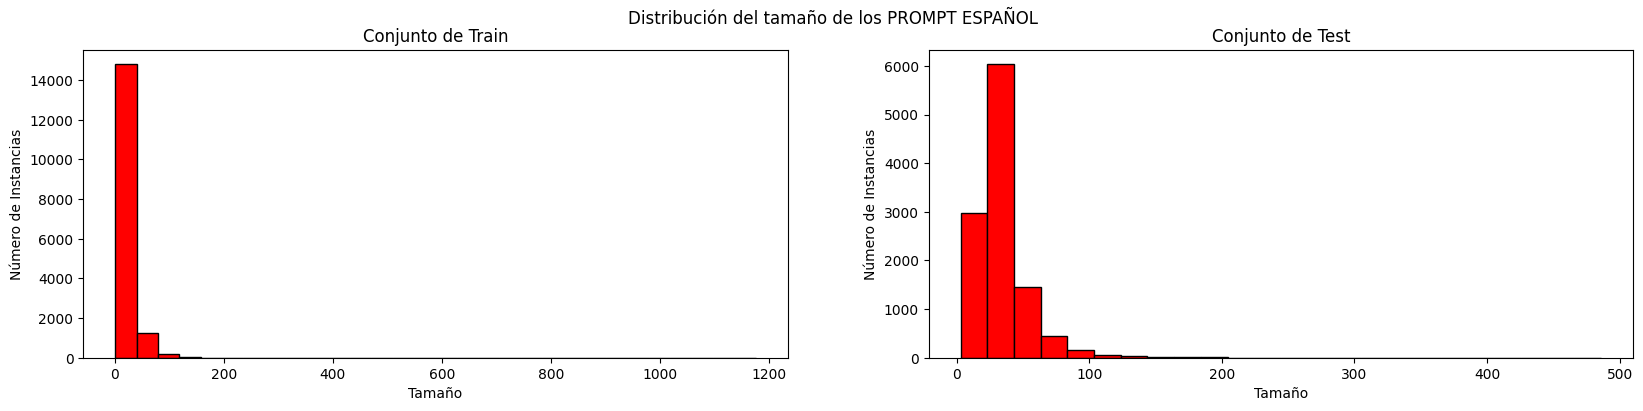

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución del tamaño de los PROMPT ESPAÑOL')

ax_train.hist(es_length_prompt_train,  color = 'red', edgecolor = 'black',
         bins = int(150/5))
ax_train.set_title('Conjunto de Train')
ax_train.set_xlabel('Tamaño')
ax_train.set_ylabel('Número de Instancias')

ax_test.hist(es_length_prompt_test,  color = 'red', edgecolor = 'black',
         bins = int(120/5))
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Tamaño')
ax_test.set_ylabel('Número de Instancias')

